
### About Dataset: 
- Excel sheet of data containing two sheeets, marketing campaigns, Google Ads, and a listing site.
### Column Information:
- `cost`: is our total ad spends for that particular date.
- `Impressions`: are the count of people who view our ad
- `clicks`: are count of clicks on our ad
-  `prospects`: are count of people interested in our product (as marked by sales)
- `Payments`: are purchases made. Returns on Ad spends are calculated using Payments/Cost.
- Each row is cohortised to the date of ad spends so you can compare quality of ad spends.

### Problem Statement:
- Create a combined report with all key metrics (especially: Spends and Returns %) in a weekly and monthly format. Decide the number of data fields you would like to showcase here.
- Which is the most profitable channel
- Which category/keyword is the most profitable
- Look for insights by analyzing data points on time series graphs
- Analyse the Impact of geography

### Import basic required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import plotly.express as px

### Load the both sheets

In [2]:
ad_data=pd.read_excel('data.xlsx', sheet_name=0)
ad_data.head()

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost ($),Leads,Prospects,Payment ($),Payment Date,Country
0,2021-01-25,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,$980,2021-02-03,USA
1,2021-01-25,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,USD,1,13,11.70,0,0,NaN,NaT,USA
2,2021-01-25,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,4,154,45.13,0,1,"$1,188",2021-03-13,USA
3,2021-01-25,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,USD,2,8,23.91,0,0,NaN,NaT,USA
4,2021-01-25,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,2,13,4.89,0,0,NaN,NaT,USA


In [3]:
site_data=pd.read_excel('data.xlsx', sheet_name=1)
site_data.head()

,Product Name,Categories,Date of Report,Average Position,Clicks,Leads,Money Spent ($),Channel,Location,Prospects,Paid,Paid Date
0,Omnify,Coaching,2020-10-20 00:00:00,13.0,1.0,NaN,2.0,Capterra,UNITED STATES,NaN,NaN,NaT
1,Omnify,Dance Studio,2020-10-20 00:00:00,20.0,1.0,NaN,2.0,Capterra,UNITED KINGDOM,NaN,NaN,NaT
2,Omnify,Personal Trainer,2020-10-20 00:00:00,6.0,1.0,NaN,2.0,Capterra,SINGAPORE,NaN,NaN,NaT
3,Omnify,Scheduling,2020-10-20 00:00:00,59.0,1.0,NaN,2.0,GetApp,UNITED STATES,NaN,NaN,NaT
4,Omnify,Class Registration,2020-10-21 00:00:00,6.0,1.0,NaN,2.0,Capterra,AUSTRALIA,NaN,NaN,NaT


In [4]:
site_data['Channel'].unique()

array(['Capterra', 'GetApp', 'Software Advice'], dtype=object)

Average position is a metric that describes how your ad typically ranks against other ads in the Google search engine results page123. It is calculated based on the impressions received by your ad on each position45. A lower average position means a higher ad rank, meaning the ad is appearing closer to the top of the page

### Understandng Ad data

In [5]:
ad_data.shape

(418, 14)

In [6]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Week            418 non-null    datetime64[ns]
 1   Campaign        418 non-null    object        
 2   Ad group        418 non-null    object        
 3   Keyword type    418 non-null    object        
 4   Search Keyword  412 non-null    object        
 5   Currency        418 non-null    object        
 6   Clicks          418 non-null    int64         
 7   Impressions     418 non-null    int64         
 8   Cost ($)        418 non-null    float64       
 9   Leads           418 non-null    int64         
 10  Prospects       418 non-null    int64         
 11  Payment ($)     8 non-null      object        
 12  Payment Date    8 non-null      datetime64[ns]
 13  Country         418 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(4), object(7)
memo

### Understand site data

In [7]:
site_data.shape

(2091, 12)

In [8]:
site_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2091 entries, 0 to 2090
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Product Name      2091 non-null   object        
 1   Categories        2091 non-null   object        
 2   Date of Report    2091 non-null   object        
 3   Average Position  2090 non-null   float64       
 4   Clicks            2090 non-null   float64       
 5   Leads             163 non-null    float64       
 6   Money Spent ($)   2089 non-null   float64       
 7   Channel           2091 non-null   object        
 8   Location          2091 non-null   object        
 9   Prospects         66 non-null     float64       
 10  Paid              14 non-null     object        
 11  Paid Date         13 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(6)
memory usage: 196.2+ KB


### Missing values in ad data

In [9]:
ad_data.isna().sum()

Week                0
Campaign            0
Ad group            0
Keyword type        0
Search Keyword      6
Currency            0
Clicks              0
Impressions         0
Cost ($)            0
Leads               0
Prospects           0
Payment ($)       410
Payment Date      410
Country             0
dtype: int64

#### There 6 missing values in Search Keyword, 410 missing values in both Payment and Payment date.

In [10]:
ad_data.fillna(0, axis=0, inplace=True)

### Missing values in site data

In [11]:
site_data.isna().sum()

Product Name           0
Categories             0
Date of Report         0
Average Position       1
Clicks                 1
Leads               1928
Money Spent ($)        2
Channel                0
Location               0
Prospects           2025
Paid                2077
Paid Date           2078
dtype: int64

In [34]:
site_data['Average Position'].fillna(0, axis=0, inplace=True)
site_data['Money Spent ($)'].fillna(0, axis=0, inplace=True)
site_data['Clicks'].fillna(0, axis=0, inplace=True)
site_data['Leads'].fillna(0, axis=0, inplace=True)
site_data['Prospects'].fillna(0, axis=0, inplace=True)

## 1. Create a combined report with all key metrics (especially: Spends and Returns %) in a weekly and monthly format.

In [12]:
#Changing datatype of Payment column from object to float
ad_data['Payment ($)']=ad_data['Payment ($)'].str.replace("$","").str.replace(",","")
ad_data['Payment ($)']=ad_data['Payment ($)'].astype(float)

In [13]:
#creating new column return percentage
ad_data['Returns Percentage']=round((ad_data['Payment ($)']/ad_data['Cost ($)']), 2)

In [14]:
ad_data.fillna(0, axis=0, inplace=True)

In [15]:
#Creating new column month and week
ad_data.rename({"Week":'Date'}, axis=1, inplace=True)

ad_data['month']=ad_data['Date'].dt.month

In [16]:
from math import ceil
import datetime

def week_of_month (dt):
    first_day = dt.replace (day=1)
    dom = dt.day
    adjusted_dom = dom + first_day.weekday ()
    return int (ceil (adjusted_dom/7.0))

ad_data['week']=ad_data['Date'].apply(week_of_month)

In [20]:
metrics=['Clicks', 'Impressions', 'Leads', 'Prospects', 'Cost ($)', 'Payment ($)', 'Returns Percentage']

In [56]:
print("Weekly and Monthly Report of Average Monthly and Weekly Spending and Return Percentage on Ad")
pd.pivot_table(data=ad_data, index=['month','week'], values=metrics).round(2)

Weekly and Monthly Report of Average Monthly and Weekly Spending and Return Percentage on Ad


Clicks  Cost ($)  Impressions  Leads  Payment ($)  Prospects  \
month week                                                                 
1     5       0.56      5.73        11.81   0.04        80.30       0.07   
2     1       0.63      6.42        12.43   0.00         0.00       0.03   
      2       0.84      8.65        14.56   0.00        39.20       0.04   
      3       1.06      7.13        20.33   0.00        54.18       0.06   
      4       0.67      5.78        14.48   0.00         0.00       0.03   
3     1       0.52      5.24        15.07   0.00        36.30       0.04   
      2       1.17      8.90        17.34   0.10         0.00       0.03   
      3       0.71      5.95        15.10   0.03         0.00       0.00   
      4       1.35      9.08        19.38   0.03        70.24       0.12   
      5       1.70      7.48        25.48   0.00         0.00       0.00   
4     2       1.32      8.04        20.95   0.09         0.00       0.00   
      3       1.20      6.86        16.20   0.05       119.40       0.20   
      4       0.73      3.36        12.62   0.04         0.00       0.04   
      5       0.59      3.56        16.79   0.03         0.00       0.00   
5     2       1.07      7.91        18.52   0.03        40.97       0.10   

            Returns Percentage  
month week                      
1     5                   1.92  
2     1                   0.00  
      2                   3.25  
      3                   3.39  
      4                   0.00  
3     1                   0.86  
      2                   0.00  
      3                   0.00  
      4                   1.40  
      5                   0.00  
4     2                   0.00  
      3                   6.08  
      4                   0.00  
      5                   0.00  
5     2                   0.62

### Insight:
1. In the month 3 means in March and the week 5th omnify products recieves more clicks.
2. Least clicks in the period of March 1st week.
3. In the period of march 4th week most money spent on advertizing. Least money spend in 4th week of April.
4. Most impression recieved in the 5th week of March and least impression on product recieved in 5th week of January.
5. The 2nd week of march recieved most leads.
6. Zero leads recived in all the weeks of February and 1st and 5th week of March.
7. In the 3rd week of April highest revenue collected on omnify ad.
8. 1st and 4th week of February, 2nd, 3rd and 5th week of March and 2nd, 4th, 5th week of April earns zero revenue from advertise.
9. Moste prospect count in the 3rd week of April month and least prospect in 2nd and 5th week of April.
10. In Aprils 3ed week most profit earn, and the least profit is in the 2nd, 4th and 4th week of April.

### 2. Which is the most profitable channel?

In [48]:
pd.pivot_table(data=site_data, index='Channel', values=['Clicks', 'Average Position', 
                                                        'Leads','Prospects','Money Spent ($)'])

,Average Position,Clicks,Leads,Money Spent ($),Prospects
Channel,,,,,
Capterra,9.291982,1.962841,0.113955,16.070892,0.041288
GetApp,13.016570,1.259394,0.053333,6.605939,0.018182
Software Advice,7.954545,1.109091,0.072727,5.663636,0.054545


### Insights:
1. Most money on advertising is alloted to channel "Capterra" and least to "Software Advice".
2. Most prospects recieved on "Software Advice" channel.
3. Omnify products recieved Highest leads and Clicks on "Capterra" Channel.
4. Least clicks recieved on "Software Advice" channel.
5. Average minimum leads recived on "GetAPp" channel.
6. On Get app channel omnify products ad ranked higher.
- Leads and CLicks are high in "Capterra" channel so this is the most profitable channel to advertize omnify product.

## 3. Which Category or Keyword is most profitable?

In [22]:
print("Profitable Keywords or Categories")
pd.pivot_table(data=ad_data, index=['Keyword type', 'Search Keyword'],
               values=['Cost ($)','Returns Percentage']).sort_values(ascending=False, by='Returns Percentage')[:10]

Profitable Keywords or Categories


Cost ($)  Returns Percentage
Keyword type Search Keyword                                                
Phrase       yoga studio software             21.886667            6.030000
             reservation management system     4.320488            2.965610
Broad        pool reservation software         6.405833            2.686458
Exact        reservation management system     1.145918            2.284898
Broad        yoga studio booking software     32.923750            2.062917
Exact        pool reservation system          15.045000            1.598125
Broad        yoga studio app                  30.200000            0.000000
Exact        yoga studio app                   3.715000            0.000000
Phrase       yoga studio scheduling software   0.000000            0.000000
             yoga studio management software   0.000000            0.000000

### Yoga Studio software is the most profitable category or keyword.

## 4. Look for insights by analyzing data points on time series graphs

#### 1. Advertise data over time

In [36]:
interested_columns=['Date','Clicks', 'Impressions', 'Leads', 'Prospects', 'Cost ($)', 'Payment ($)', 'Returns Percentage']
sample=ad_data[interested_columns]
sample.set_index('Date', inplace=True)

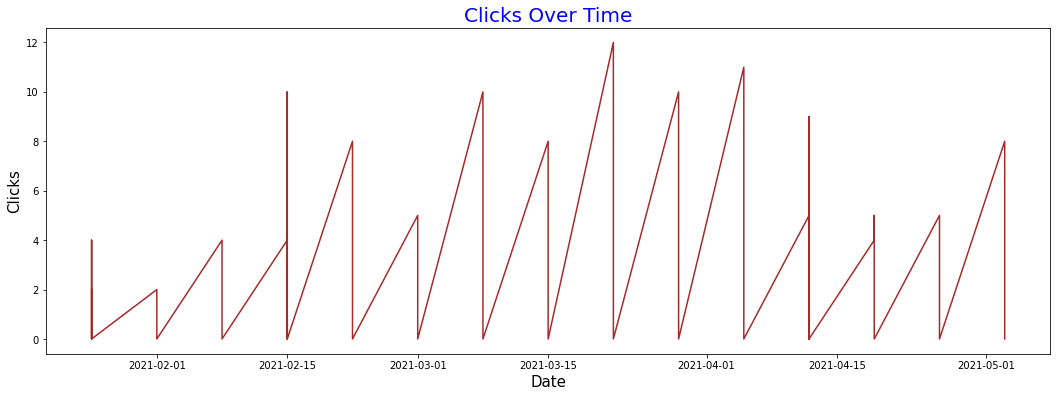

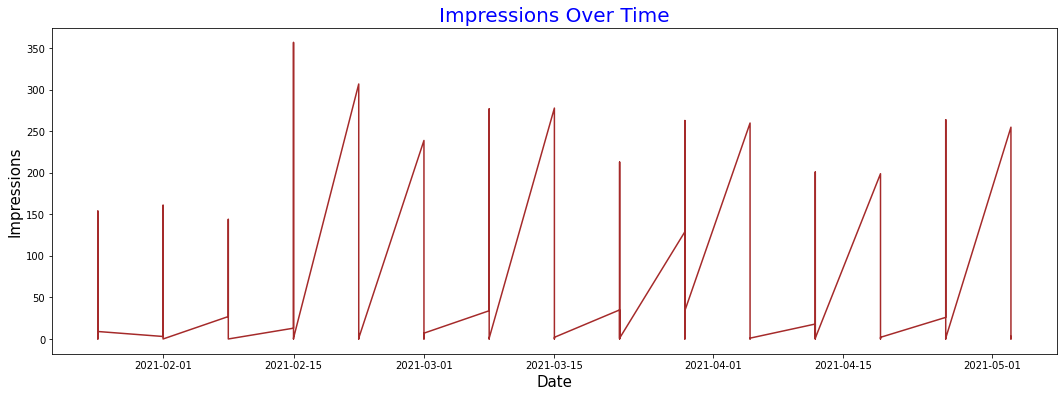

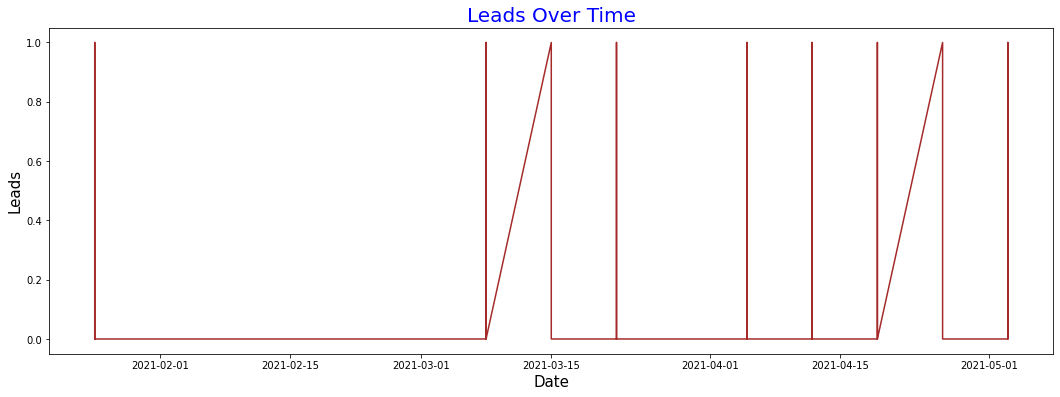

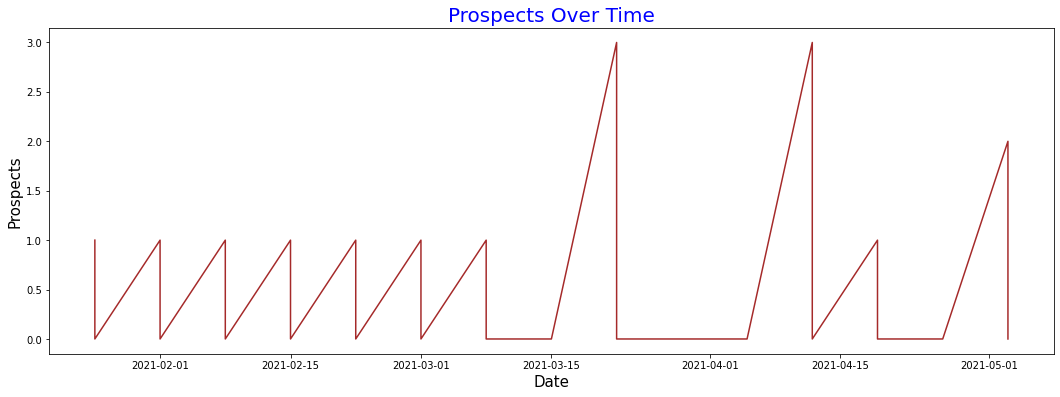

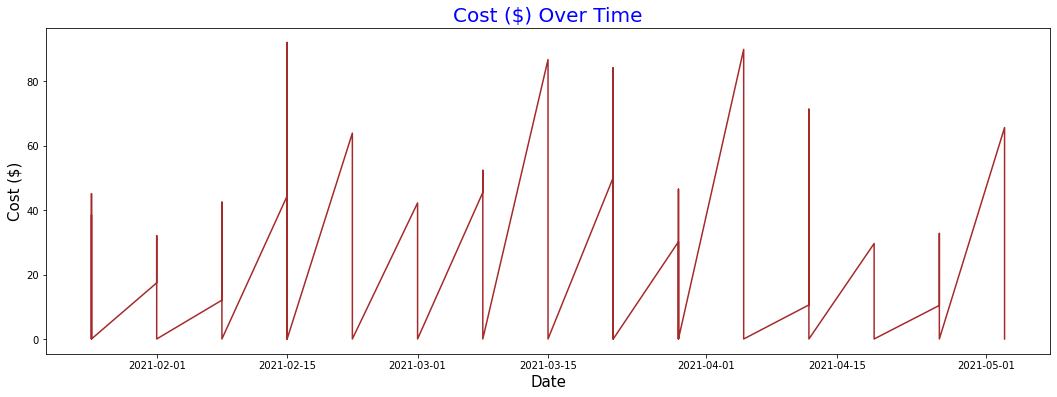

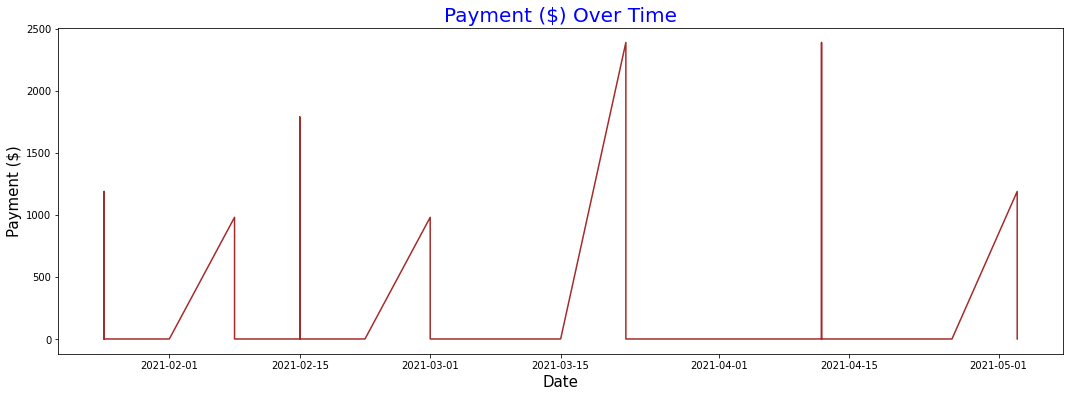

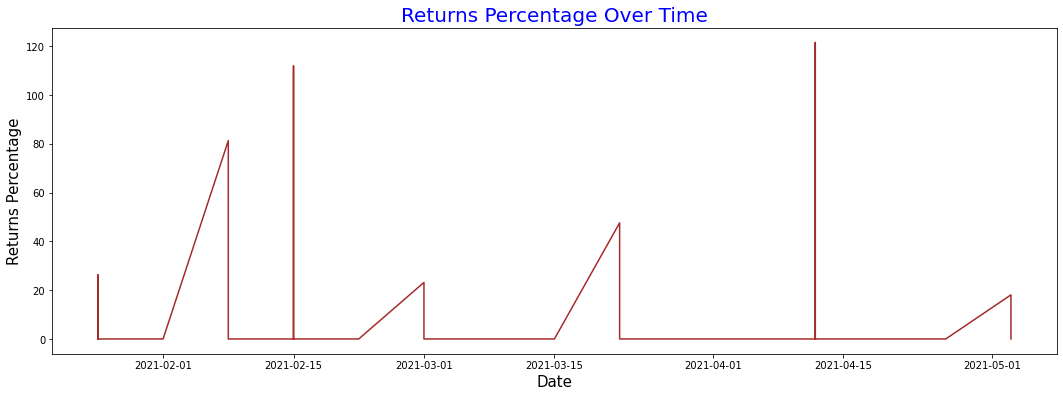

In [37]:
for col in sample.columns:
    plt.figure(figsize=(18,6))
    plt.plot(sample[col], color='brown')
    plt.xlabel("Date", fontsize=15)
    plt.ylabel(col, fontsize=15)
    plt.title(f"{col} Over Time", fontsize=20, color='blue');

### Insights:
1. There is no trend in the dataset over time.

#### 2. Site data over time

In [46]:
df_site=pd.pivot_table(data=site_data, index='Date of Report', values=['Clicks', 'Average Position', 
                                                                       'Leads','Prospects','Money Spent ($)']).reset_index()
df_site['Date of Report']=pd.to_datetime(df_site['Date of Report'])
df_site

,Date of Report,Average Position,Clicks,Leads,Money Spent ($),Prospects
0,2020-10-20,24.500000,1.000000,0.000000,2.000000,0.0
1,2020-10-21,20.625000,1.000000,0.000000,2.000000,0.0
2,2020-10-22,24.500000,1.000000,0.000000,2.000000,0.0
3,2020-10-23,10.285714,1.142857,0.000000,2.285714,0.0
4,2020-10-24,13.500000,1.000000,0.000000,2.000000,0.0
...,...,...,...,...,...,...
185,2021-04-26,6.590000,1.800000,0.100000,12.500000,0.1
186,2021-04-27,8.700000,2.800000,0.200000,26.800000,0.0
187,2021-04-28,9.664000,7.000000,0.400000,70.200000,0.2
188,2021-04-29,13.036667,1.444444,0.333333,13.722222,0.0


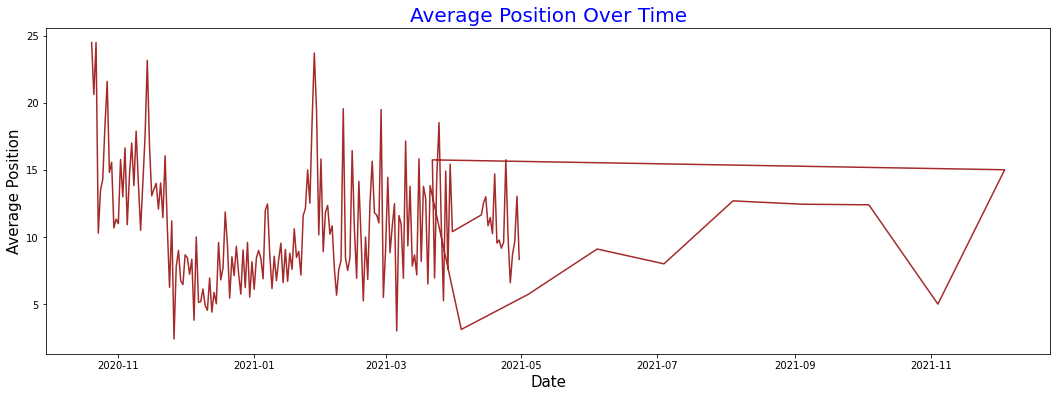

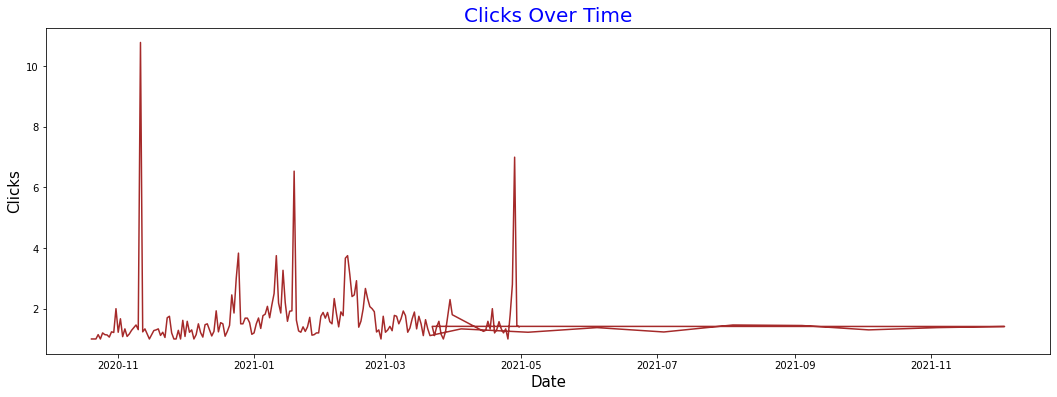

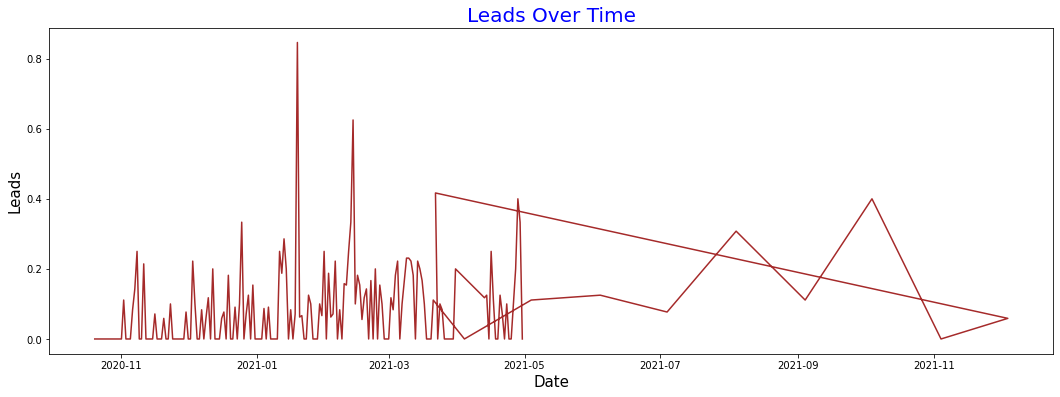

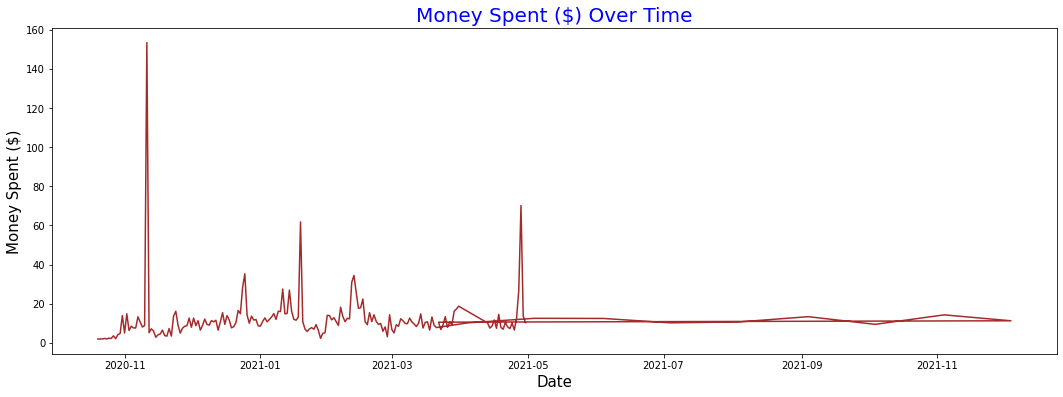

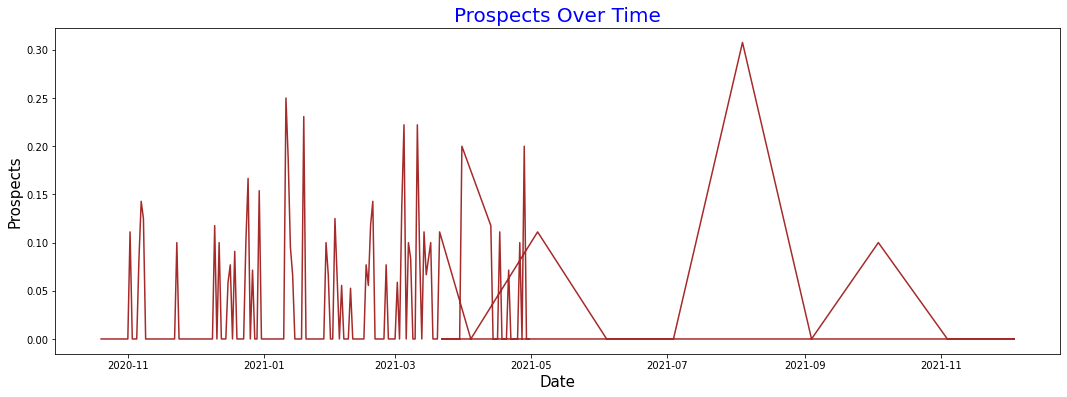

In [47]:
df_site.set_index('Date of Report', inplace=True)

for col in df_site.columns:
    plt.figure(figsize=(18,6))
    plt.plot(df_site[col], color='brown')
    plt.xlabel("Date", fontsize=15)
    plt.ylabel(col, fontsize=15)
    plt.title(f"{col} Over Time", fontsize=20, color='blue');

### Insights:
- Data not following trend over time.

### 5. Analyse the Impact of geography

In [30]:
site_data['Location'].replace({'AUSTRALIA':'Australia','CANADA':'Canada','SINGAPORE':'Singapore',
                              'UK':'United Kingdom','UNITED KINGDOM':'United Kingdom',
                              'UNITED STATES':'United States','USA':'United States',
                              'US':'United States'}, inplace=True)

In [35]:
pd.pivot_table(data=site_data, index='Location', 
               values=['Clicks', 'Average Position', 'Leads','Prospects','Money Spent ($)'])

,Average Position,Clicks,Leads,Money Spent ($),Prospects
Location,,,,,
Australia,11.139644,1.240000,0.035556,5.441111,0.017778
Canada,13.894171,1.189573,0.052133,6.491706,0.023697
Middle East,1.000000,1.000000,1.000000,0.000000,1.000000
Singapore,3.196602,1.839844,0.109375,8.762695,0.031250
United Kingdom,11.847212,1.713942,0.050481,10.485216,0.016827
United States,11.448982,1.794297,0.119145,16.317872,0.043788


### Insights:
1. Average position of advertise is high in Canada.
2. In Singapore omnify products getting high average click.
3. In Middle east countries omnify products getting more leads than any other country.
4. In USA Most money spend on product ad.
5. Middle east countries has more prospect average count.